In [1]:
from google.colab import files
uploaded = files.upload()

Saving mlb_salaries.csv to mlb_salaries.csv


In [2]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Export model
import joblib
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('mlb_salaries.csv')
df.head()

,playerid,player_name,weight,height,bats,throws,season,league,teamid,team,franchise,salary
0,aardsda01,David Aardsma,215,75,R,R,2004,NL,SFN,San Francisco Giants,San Francisco Giants,300000
1,aardsda01,David Aardsma,215,75,R,R,2007,AL,CHA,Chicago White Sox,Chicago White Sox,387500
2,aardsda01,David Aardsma,215,75,R,R,2008,AL,BOS,Boston Red Sox,Boston Red Sox,403250
3,aardsda01,David Aardsma,215,75,R,R,2009,AL,SEA,Seattle Mariners,Seattle Mariners,419000
4,aardsda01,David Aardsma,215,75,R,R,2012,AL,NYA,New York Yankees,New York Yankees,500000


In [5]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28293 entries, 0 to 28292
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   playerid     28293 non-null  object
 1   player_name  28293 non-null  object
 2   weight       28293 non-null  int64 
 3   height       28293 non-null  int64 
 4   bats         28293 non-null  object
 5   throws       28293 non-null  object
 6   season       28293 non-null  int64 
 7   league       28293 non-null  object
 8   teamid       28293 non-null  object
 9   team         28293 non-null  object
 10  franchise    28293 non-null  object
 11  salary       28293 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 2.6+ MB


,0
playerid,0
player_name,0
weight,0
height,0
bats,0
throws,0
season,0
league,0
teamid,0
team,0


In [6]:
# Drop rows with missing values
df.dropna(inplace=True)

# Confirm
df.isnull().sum()

,0
playerid,0
player_name,0
weight,0
height,0
bats,0
throws,0
season,0
league,0
teamid,0
team,0


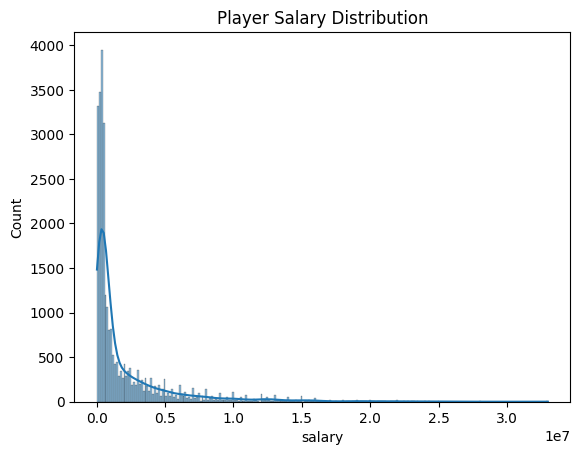

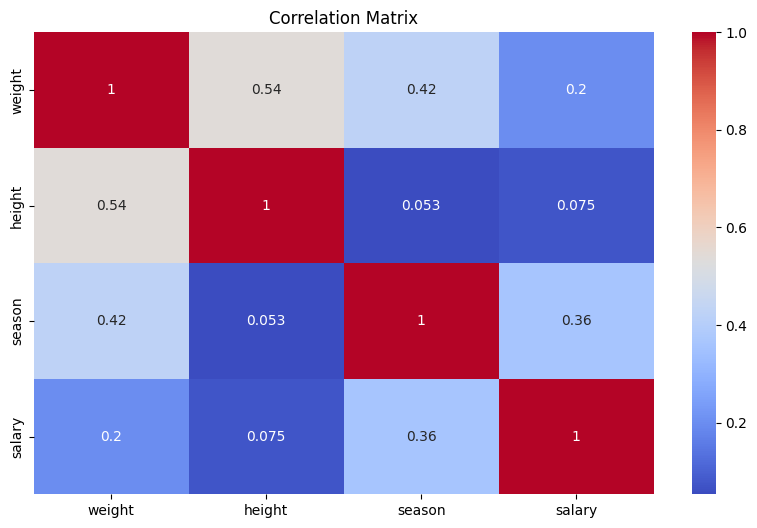

In [7]:
# Salary distribution
sns.histplot(df['salary'], kde=True)
plt.title("Player Salary Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [8]:
# Check unique categorical values
df.select_dtypes(include='object').nunique()

,0
playerid,5005
player_name,4931
bats,3
throws,2
league,2
teamid,35
team,35
franchise,30


In [11]:
le = LabelEncoder()
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [12]:
scaler = StandardScaler()
scaled_features = df.drop('salary', axis=1)
scaled_features = pd.DataFrame(scaler.fit_transform(scaled_features), columns=scaled_features.columns)

X = scaled_features
y = df['salary']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [16]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [17]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n📌 {model_name} Evaluation:")
    print("R² Score:", r2_score(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")


📌 Linear Regression Evaluation:
R² Score: 0.12549035450674628
MAE: 2058448.3447005255
RMSE: 3201869.3089027535

📌 Random Forest Evaluation:
R² Score: 0.7026994609389599
MAE: 1199698.3818642744
RMSE: 1866891.7978994714
